<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7**

# **Weeks 8 & 9 - Pandas**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 

* You must use Pandas as the **primary tool** to process your data.

* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  
 * https://www.youtube.com/watch?v=inN8seMm7UI (Getting started with Colab).

* Your data should need some "work", or be considered "dirty".  You must show your skills in data cleaning/wrangling.

### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I chose to use a dataset with data about the federal SNAP program. The dataset records the amount spent on the program, the amount recieved by each participant and the amount of participants, for each fiscal year from 1969 to 2015. The data was sourced from [here](https://data.world/agriculture/snap-participationcost-data). I will also include population data found [here] https://www.census.gov/data/tables/time-series/dec/popchange-data-text.html

This data is very interesting to me. My wife is a Registered Dietitian and I have come to realize how important the SNAP program is, not just as a survival and basic necessity program, but also as a preventative program. Having access to more funding for food allows people to make healthier decisions and prevent chronic diseases. I am curious about the growth of the SNAP program and about its management of funds, what percentage of its budget actually goes into participants pockets versus other administrative costs.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



Most graphics depicting the Data Science workflow show an arrow going from Data Exploration to Data Wrangling, and another arrow going back from Data Wrangling to Data Exploration. This is because many times we need to do some data preparation before we can properly explore our data. So we do some prep, some exploring, followed by more prep, however many iterations necessary. I faced this issue in this data and I did a few iterations of this process.

In [1]:
import pandas as pd

snap = pd.read_excel('https://query.data.world/s/u7hzygp4lb3junfphtnkxrce2okc4f?dws=00000')
display(snap.head(10))
print(snap.dtypes)

,Supplemental Nutrition Assistance Program Participation and Costs,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,"(Data as of July 8, 2016)",NaN,NaN,NaN,NaN,NaN
1,,,Average Benefit Per Person 1],,All Other Costs 2],
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Fiscal Year,Average Participation,NaN,Total Benefits,NaN,Total Costs
4,,--Thousands--,--Dollars--,----------Millions of Dollars----------,NaN,NaN
5,1969,2878,6.63,228.8,21.7,250.5
6,1970,4340,10.55,549.7,27.2,576.9
7,1971,9368,13.55,1522.7,53.2,1575.9
8,1972,11109,13.48,1797.3,69.4,1866.7
9,1973,12166,14.6,2131.4,76,2207.4


Supplemental Nutrition Assistance Program Participation and Costs    object
Unnamed: 1                                                           object
Unnamed: 2                                                           object
Unnamed: 3                                                           object
Unnamed: 4                                                           object
Unnamed: 5                                                           object
dtype: object


This data needs some work. Before finding the summary statistics we have to clean it a bit. First, we will work on getting the column names right and removing the extra first few rows. The actual column names are split between the second and fourth rows. The units the columns are measured in can be found in the fifth row. The last two columns don't say what the unit is but is evident it is the same as the column right before it. We will extract all this information for the new column names. Once we do that we can remove the non-numeric rows and convert the columns to numeric type since all the actual data is numeric.

In [2]:
# create a list of column names extracted from the second and fourth rows of the dataset 

column_names = [] #initialize an empty list

# Loop through the columns of the second and fourth rows of the dataset and append the non-empty column names to the list
for col1, col2 in zip(snap.iloc[1], snap.iloc[3]):
    if col1.strip():  # Check if col1 is not empty after stripping whitespace
        col1 = col1.strip().replace(" 1]", "").replace(" 2]", "")  # Remove ' 1]' ans ' 2]' if present
        column_names.append(col1)
    elif col2.strip():  # Check if col2 is not empty after stripping whitespace
        column_names.append(col2)
    else:
        column_names.append('')

# extract the units from the fifth row
        
fifth_row = snap.iloc[4]  # Extract the fifth sublist
key_value_pairs = {col: value for col, value in zip(column_names, fifth_row)}
col_names_final = []

# Iterate through the dictionary
for column_name, value in key_value_pairs.items():
    # If the value is not empty (not '\xa0...') and not None
    if value and value != '\xa0\xa0\xa0' and not pd.isna(value):
        # Remove '--' (potentially multiple occurrences) from the value
        value = value.replace('--', '').strip()
        # Split the value by space and take the first word
        first_word = value.split()[0]
        # Add parentheses around the word
        first_word_with_parentheses = f"({first_word})"
        # Append the first word to the column name
        col_names_final.append(f"{column_name} {first_word_with_parentheses}")
    elif pd.isna(value):
        # Add (Millions) to the column name for NaN values
        col_names_final.append(f"{column_name} (Millions)")
    else:
        # If no value to append, just use the original column name
        col_names_final.append(column_name)

print(col_names_final) # print the results to ensure the correct column names are extracted

['Fiscal Year', 'Average Participation (Thousands)', 'Average Benefit Per Person (Dollars)', 'Total Benefits (Millions)', 'All Other Costs (Millions)', 'Total Costs (Millions)']


Since they seem to be the right names, we can now rename our dataframe with the proper column names. We will also drop the first five rows now that we have extracted the necessary data.

In [3]:
snap.columns = col_names_final # assign the extracted column names to the dataset
snap_named = snap.drop(range(5)) # remove the now extaraneous rows
snap_named = snap_named.reset_index(drop=True) # reset the index
snap_named.head(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions)
0,1969,2878,6.63,228.8,21.7,250.5
1,1970,4340,10.55,549.7,27.2,576.9
2,1971,9368,13.55,1522.7,53.2,1575.9
3,1972,11109,13.48,1797.3,69.4,1866.7
4,1973,12166,14.6,2131.4,76,2207.4
5,1974,12862,17.61,2718.3,119.2,2837.5
6,1975,17064,21.4,4385.5,233.2,4618.7
7,1976,18549,23.93,5326.5,359,5685.5
8,1977,17077,24.71,5067,394,5461
9,1978,16001,26.77,5139.2,380.5,5519.7


Now that we have cleaned the column names and first few rows we will work on the extra last few rows.

In [4]:
snap_named.tail(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions)
44,2013,47636.089833,133.07,76066.32,3804.52,79870.84
45,2014,46663.616167,125.01,69998.84,4075.18,74074.02
46,2015,45766.671667,126.83,69655.43,4320.92,73976.35
47,All data are subject to revision.,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN
49,1] Represents average monthly benefits per per...,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN
51,2] Includes the Federal share of State adminis...,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN
53,3] Puerto Rico initiated Food Stamp operations...,NaN,NaN,NaN,NaN,NaN


All we have to do is drop the last 7 rows as they don't contain any new information.

In [5]:
snap_cleaned = snap_named.drop(snap_named.index[-7:])
snap_cleaned.tail(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions)
37,2006,26548.833167,94.75,30187.35,2715.72,32903.06
38,2007,26316.044583,96.18,30373.27,2800.25,33173.52
39,2008,28222.63025,102.19,34608.4,3031.25,37639.64
40,2009,33489.9745,125.31,50359.92,3260,53619.92
41,2010,40301.878,133.79,64702.16,3581.3,68283.47
42,2011,44708.726083,133.85,71810.92,3875.56,75686.49
43,2012,46609.0715,133.41,74619.34,3790.34,78409.68
44,2013,47636.089833,133.07,76066.32,3804.52,79870.84
45,2014,46663.616167,125.01,69998.84,4075.18,74074.02
46,2015,45766.671667,126.83,69655.43,4320.92,73976.35


Now that we removed the non-numeric data, we can convert the columns to numeric type. We will create a function to convert each column while handling exceptions. Any values that trigger exceptions will be dealt with.

In [6]:
# Function to convert a value to numeric, handling exceptions
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        return value

# Convert each column to numeric type, handling exceptions
converted_columns = {}
for column in snap_cleaned.columns:
    snap_cleaned[column] = snap_cleaned[column].apply(convert_to_numeric)

# Check the class of each column after conversion
print(snap_cleaned.dtypes)


Fiscal Year                              object
Average Participation (Thousands)       float64
Average Benefit Per Person (Dollars)    float64
Total Benefits (Millions)               float64
All Other Costs (Millions)              float64
Total Costs (Millions)                  float64
dtype: object


We were mostly successful. All but one column were successfully converted to float type. Column 'Fiscal Year' has a non-numeric value. We will create a function to find the value and investigate it.

In [7]:
# Function to convert a value to numeric, handling exceptions
def find_non_numeric(value):
    try:
        pd.to_numeric(value)
        return False  # Return False if conversion is successful
    except ValueError:
        return True   # Return True if conversion fails

# Filter the DataFrame for non-numeric values in the 'Fiscal Year' column
non_numeric_fiscal_years = snap_cleaned[snap_cleaned['Fiscal Year'].apply(find_non_numeric)]

# Display the non-numeric values causing issues in the 'Fiscal Year' column
print("Non-numeric values in the 'Fiscal Year' column:")
print(non_numeric_fiscal_years['Fiscal Year'])


Non-numeric values in the 'Fiscal Year' column:
13    1982 3]
Name: Fiscal Year, dtype: object


In row index 13, the year has a '3]' added on. This was a footnote to one of our deleted rows. We will remove this notation and then convert the column.

In [8]:
# Remove the ' 3]' suffix from the non-numeric value in the 'Fiscal Year' column
snap_cleaned.loc[non_numeric_fiscal_years.index, 'Fiscal Year'] = non_numeric_fiscal_years['Fiscal Year'].str.replace(' 3]', '')

# Convert the 'Fiscal Year' column to numeric type
snap_cleaned['Fiscal Year'] = convert_to_numeric(snap_cleaned['Fiscal Year'])

snap_cleaned.dtypes

Fiscal Year                               int64
Average Participation (Thousands)       float64
Average Benefit Per Person (Dollars)    float64
Total Benefits (Millions)               float64
All Other Costs (Millions)              float64
Total Costs (Millions)                  float64
dtype: object

We can now find some summary statistics for our cleaned data.

A flaw of this data is that the count of people apllying for SNAP would rise as the population of the USA rises. This would obviously lead to greater costs as well. This data does not contain any population parameters. To solve this, I will add the data from the US Census website. This contains the population data for every 10 years.

In [9]:
# Define the census DataFrame
census = {'year': [1960, 1970, 1980, 1990, 2000, 2010, 2020],
          'Population': [179323926, 203211926, 226545805, 248421906, 281421906, 308745538, 331449281]}
Population = pd.DataFrame(census)

# Merge snap_cleaned with population based on 'Fiscal Year' and 'year' columns
merged_df = pd.merge(snap_cleaned, Population, left_on='Fiscal Year', right_on='year', how='left')

# Drop the extraneous 'year' column
merged_df.drop(columns=['year'], inplace=True)

merged_df.head(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population
0,1969,2878.0,6.63,228.8,21.7,250.5,NaN
1,1970,4340.0,10.55,549.7,27.2,576.9,203211926.0
2,1971,9368.0,13.55,1522.7,53.2,1575.9,NaN
3,1972,11109.0,13.48,1797.3,69.4,1866.7,NaN
4,1973,12166.0,14.60,2131.4,76.0,2207.4,NaN
5,1974,12862.0,17.61,2718.3,119.2,2837.5,NaN
6,1975,17064.0,21.40,4385.5,233.2,4618.7,NaN
7,1976,18549.0,23.93,5326.5,359.0,5685.5,NaN
8,1977,17077.0,24.71,5067.0,394.0,5461.0,NaN
9,1978,16001.0,26.77,5139.2,380.5,5519.7,NaN


We successfully added the population data for the first year of each decade. However, in order to work with this data we need to have some value for the rest of the years. Simply dividing the difference in population from the beginning of the decade to the end in 10 and assigning one part growth to each year would not be an accurate imputation. Population grows exponentially and we would need to account for the compounded nature of the growth. To impute the missing values, I calculated the CAGR (compound annual growth rate) for each decade, added it to the population dataframe and used that to estimate the population parameter for each of the missing years.

In [10]:
# Calculate the CAGR for each decade
Population['CAGR'] = (Population['Population'].shift(-1) / Population['Population']) ** (1/10) - 1

# Merge snap_cleaned with population based on 'Fiscal Year' and 'year' columns
merged_df = pd.merge(snap_cleaned, Population, left_on='Fiscal Year', right_on='year', how='left')

merged_df.drop(columns=['year'], inplace=True)

# Impute population values for missing years based on compound growth
for year in range(merged_df['Fiscal Year'].min(), merged_df['Fiscal Year'].max() + 1):
    if pd.isna(merged_df.loc[merged_df['Fiscal Year'] == year, 'Population'].iloc[0]):
        decade = year // 10 * 10
        prev_year = year - 1
        prev_population_series = merged_df.loc[merged_df['Fiscal Year'] == prev_year, 'Population']
        if not prev_population_series.empty:
            prev_population = prev_population_series.iloc[0]
            if pd.notna(prev_population):
                cagr = merged_df.loc[merged_df['Fiscal Year'] == decade, 'CAGR'].iloc[0]
                estimated_population = prev_population * (1 + cagr)
                merged_df.loc[merged_df['Fiscal Year'] == year, 'Population'] = estimated_population

merged_df.head(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population,CAGR
0,1969,2878.0,6.63,228.8,21.7,250.5,NaN,NaN
1,1970,4340.0,10.55,549.7,27.2,576.9,2.032119e+08,0.010929
2,1971,9368.0,13.55,1522.7,53.2,1575.9,2.054328e+08,NaN
3,1972,11109.0,13.48,1797.3,69.4,1866.7,2.076780e+08,NaN
4,1973,12166.0,14.60,2131.4,76.0,2207.4,2.099478e+08,NaN
5,1974,12862.0,17.61,2718.3,119.2,2837.5,2.122423e+08,NaN
6,1975,17064.0,21.40,4385.5,233.2,4618.7,2.145619e+08,NaN
7,1976,18549.0,23.93,5326.5,359.0,5685.5,2.169069e+08,NaN
8,1977,17077.0,24.71,5067.0,394.0,5461.0,2.192775e+08,NaN
9,1978,16001.0,26.77,5139.2,380.5,5519.7,2.216739e+08,NaN


That mostly worked. However, the first year in our dataset, 1969, still has NaN for the population data. This is because there was no record for 1960 to merge the CAGR to. We do have it the value of it saved to our original population dataframe though. However, for one year, I will just use the CAGR for the following decade to calculate the population for the missing year. Afterwards, I can convert the column to int type to get rid of the scientific notation and drop the CAGR column.

In [11]:
index_1969 = merged_df.index[merged_df['Fiscal Year'] == 1969][0]

# Find the CAGR for the year 1970
cagr_1970 = merged_df.loc[merged_df['Fiscal Year'] == 1970, 'CAGR'].iloc[0]

# Find the population for the year 1970
population_1970 = merged_df.loc[merged_df['Fiscal Year'] == 1970, 'Population'].iloc[0]

# Calculate the estimated population for the year 1969
estimated_population_1969 = population_1970 / (1 + cagr_1970)

# Cast the estimated population to integer
estimated_population_1969 = int(estimated_population_1969)

# Update the Population value for the row with Fiscal Year = 1969
merged_df.at[index_1969, 'Population'] = estimated_population_1969

# Convert to int
merged_df['Population'] = merged_df['Population'].astype(int)

# Drop CAGR
merged_df.drop(columns=['CAGR'], inplace=True)

merged_df.head(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population
0,1969,2878.0,6.63,228.8,21.7,250.5,201015019
1,1970,4340.0,10.55,549.7,27.2,576.9,203211926
2,1971,9368.0,13.55,1522.7,53.2,1575.9,205432842
3,1972,11109.0,13.48,1797.3,69.4,1866.7,207678031
4,1973,12166.0,14.60,2131.4,76.0,2207.4,209947758
5,1974,12862.0,17.61,2718.3,119.2,2837.5,212242291
6,1975,17064.0,21.40,4385.5,233.2,4618.7,214561901
7,1976,18549.0,23.93,5326.5,359.0,5685.5,216906862
8,1977,17077.0,24.71,5067.0,394.0,5461.0,219277451
9,1978,16001.0,26.77,5139.2,380.5,5519.7,221673949


Now that we have our population data, I will create a new column with the ratio of participants to population and another column with the ratio of total cost to participants. These are to represent the rising amount of participants just due to greater population and the greater amount of taxpayers funding the program.

In [12]:
# Calculate the ratio of participants to population
merged_df['Participants to Population Ratio'] = merged_df['Average Participation (Thousands)'] / merged_df['Population']

# Calculate the ratio of total cost to participants
merged_df['Total Cost to Population Ratio'] = merged_df['Total Costs (Millions)'] / merged_df['Average Participation (Thousands)']

# Display the DataFrame with the new columns
merged_df.head()


,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population,Participants to Population Ratio,Total Cost to Population Ratio
0,1969,2878.0,6.63,228.8,21.7,250.5,201015019,0.000014,0.087040
1,1970,4340.0,10.55,549.7,27.2,576.9,203211926,0.000021,0.132926
2,1971,9368.0,13.55,1522.7,53.2,1575.9,205432842,0.000046,0.168222
3,1972,11109.0,13.48,1797.3,69.4,1866.7,207678031,0.000053,0.168035
4,1973,12166.0,14.60,2131.4,76.0,2207.4,209947758,0.000058,0.181440


Now that the data is cleaned we can generate some summary statistics and descriptive plots. The below table shows us the basic summary statistics of our dataset, the amount of observations, the mean of all the observations, etc. For the Fiscal Year column, only the min and max atually have much value since the year isn't a typical value to be analyzed like the rest.

In [13]:

#summary statistics
merged_df.describe()

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population,Participants to Population Ratio,Total Cost to Population Ratio
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01,47.000000,47.000000
mean,1992.000000,23165.154807,64.301489,21951.356809,1656.606596,23607.963191,2.584779e+08,0.000087,0.834856
std,13.711309,10344.826789,37.427010,21475.866799,1248.400973,22631.494960,3.673181e+07,0.000029,0.479741
min,1969.000000,2878.000000,6.630000,228.800000,21.700000,250.500000,2.010150e+08,0.000014,0.087040
25%,1980.500000,17917.768958,36.820000,9464.600000,540.500000,10021.600000,2.275948e+08,0.000073,0.467848
50%,1992.000000,21082.000000,67.950000,15547.390000,1556.660000,17789.390000,2.546968e+08,0.000084,0.876465
75%,2003.500000,26432.438875,85.050000,23691.480000,2446.075000,25859.700000,2.907017e+08,0.000097,1.129443
max,2015.000000,47636.089833,133.850000,76066.320000,4320.920000,79870.840000,3.198961e+08,0.000151,1.694300


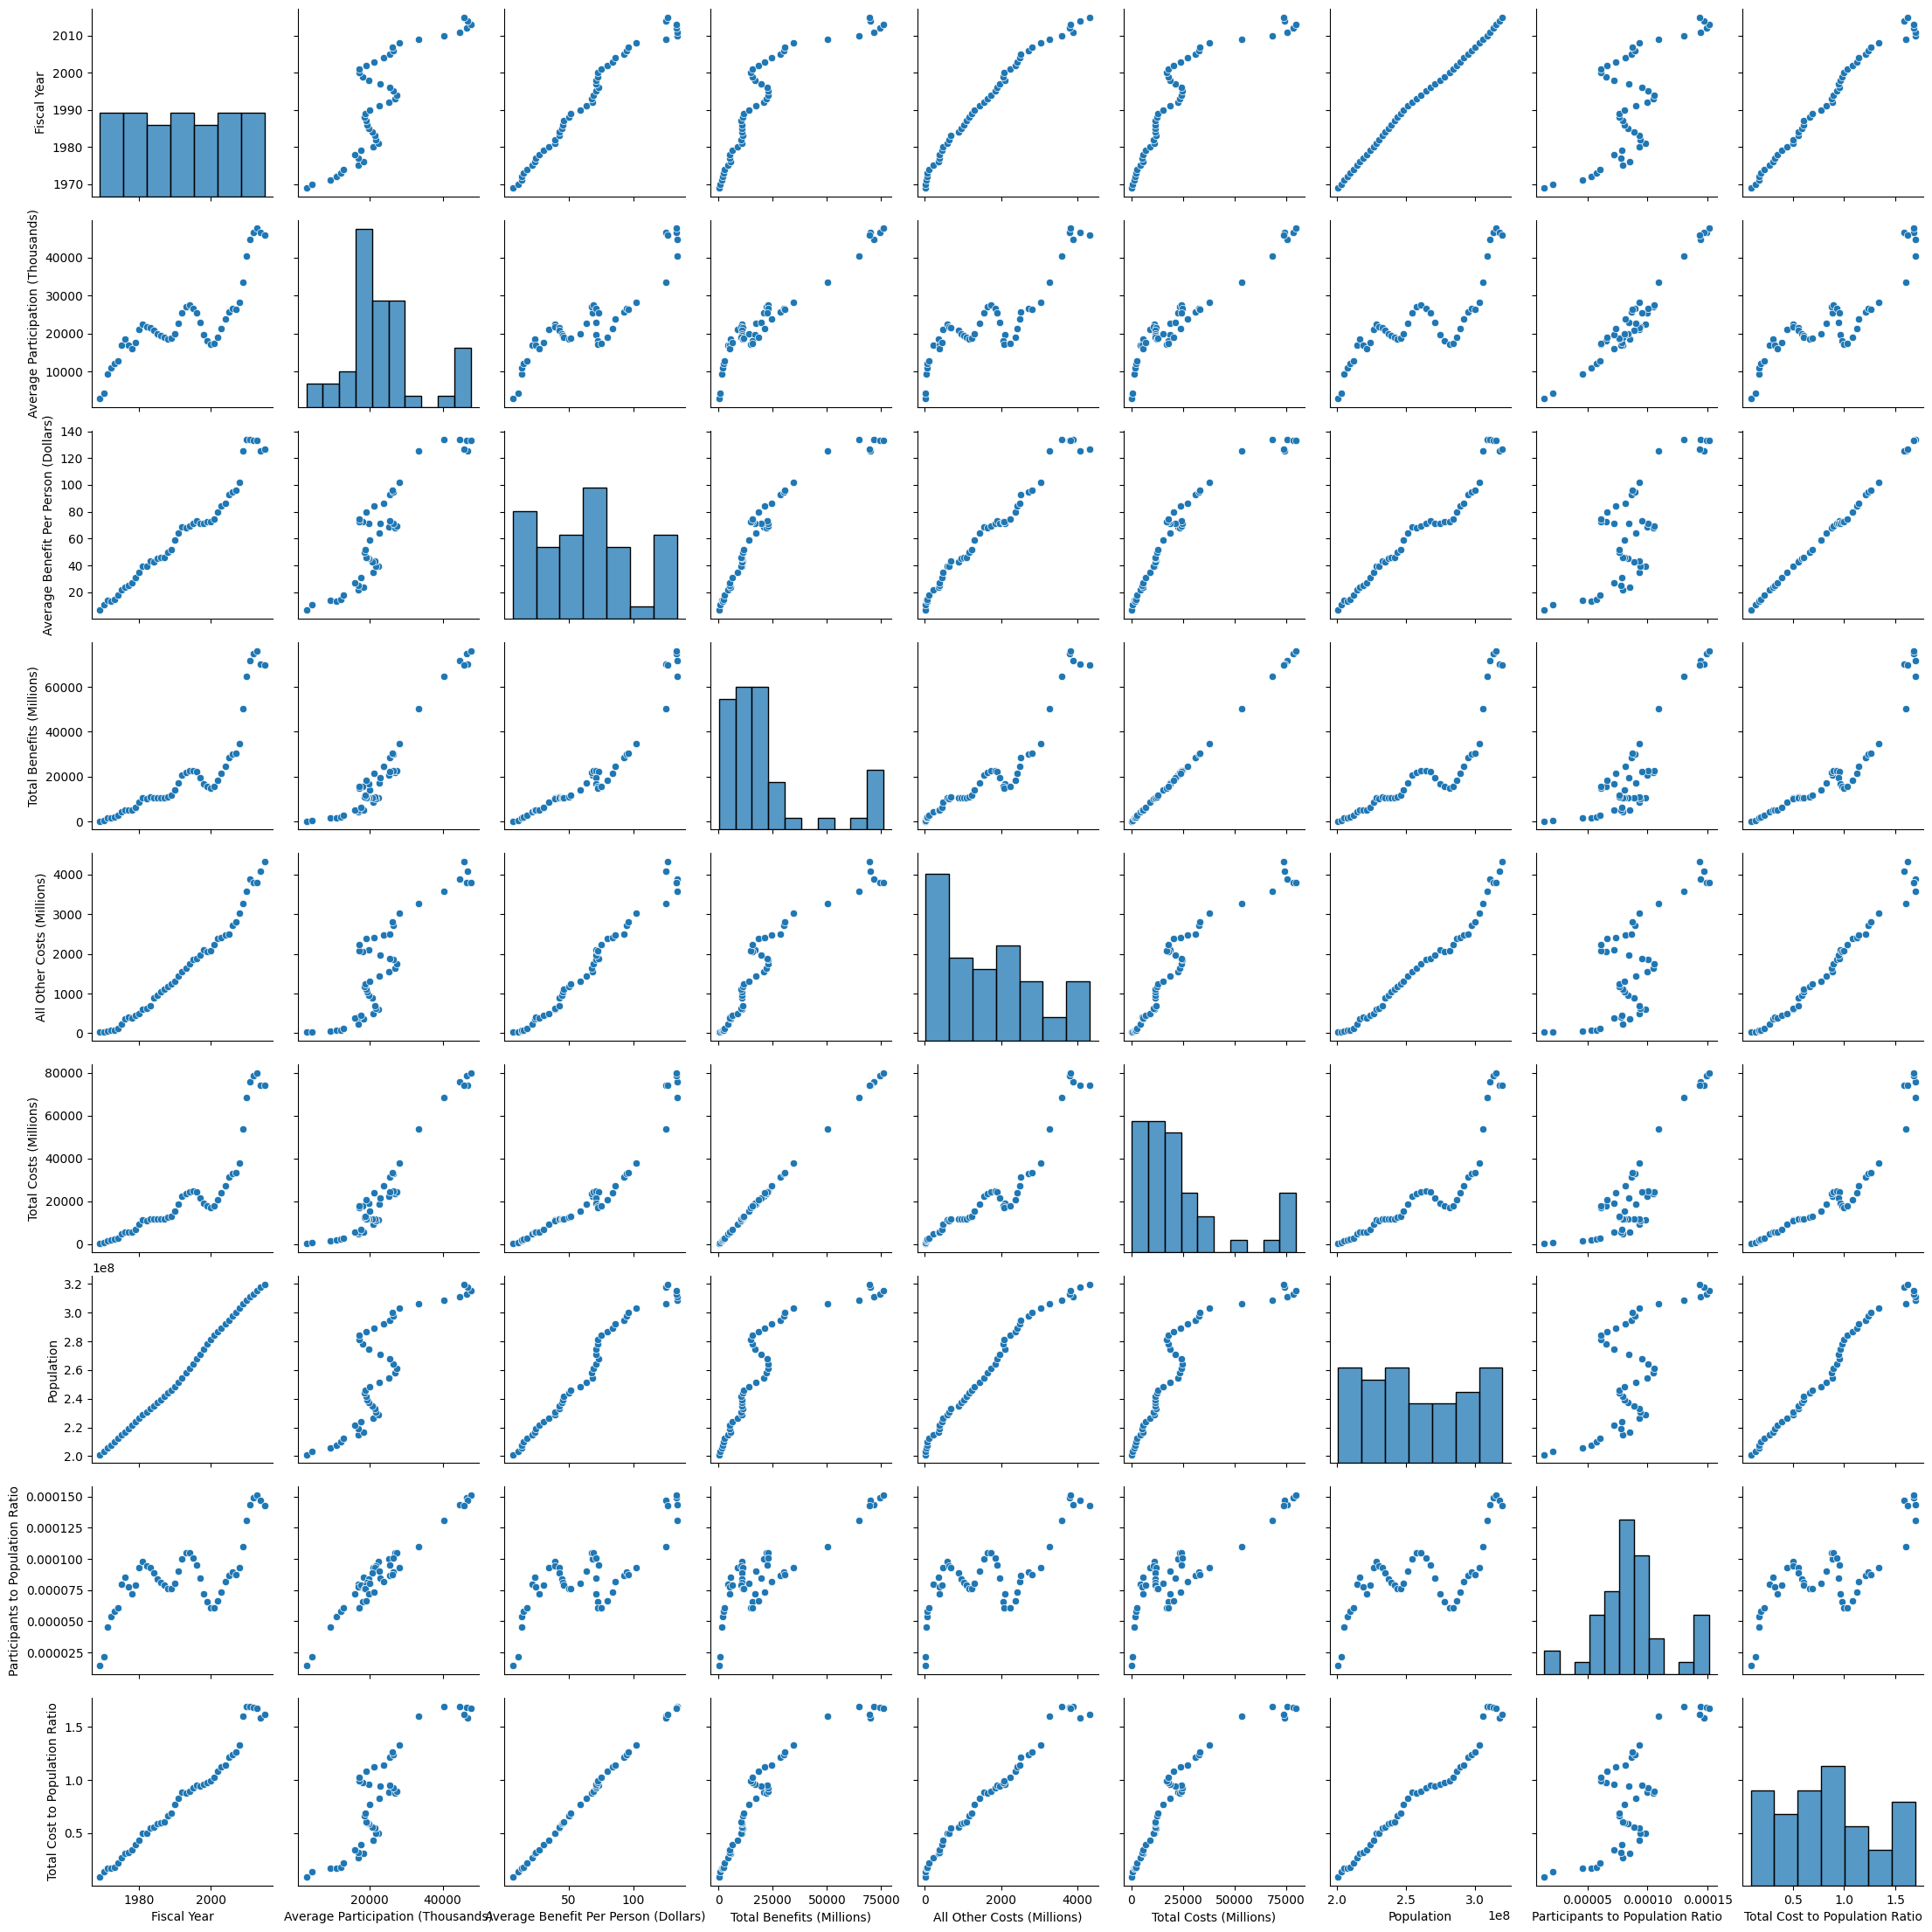

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(merged_df)
plt.show()

# Data Wrangling
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables. 

8. Filter your data based on some condition. 

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group. 
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups. 

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

Suppose we're interested in seeing which years had the highest ratio of SNAP partiicpants to US population. We can sort our dataset by the Participants Ratio column. We can further sort it by another column to be used as a sort of tiebreaker like using the Average Benefit per Person column to see how much each participant was getting in those high participation years.

In [16]:
# Sorting by multiple variables, mostly to see the highest participants ratio
sorted_df = merged_df.sort_values(by=['Participants to Population Ratio', 'Average Benefit Per Person (Dollars)'], ascending=[False, False])

sorted_df.head(20)


,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population,Participants to Population Ratio,Total Cost to Population Ratio
44,2013,47636.089833,133.07,76066.32,3804.52,79870.84,315388321,0.000151,1.676688
43,2012,46609.071500,133.41,74619.34,3790.34,78409.68,313158329,0.000149,1.682284
45,2014,46663.616167,125.01,69998.84,4075.18,74074.02,317634192,0.000147,1.587404
42,2011,44708.726083,133.85,71810.92,3875.56,75686.49,310944105,0.000144,1.692880
46,2015,45766.671667,126.83,69655.43,4320.92,73976.35,319896055,0.000143,1.616380
41,2010,40301.878000,133.79,64702.16,3581.30,68283.47,308745538,0.000131,1.694300
40,2009,33489.974500,125.31,50359.92,3260.00,53619.92,305897840,0.000109,1.601074
25,1994,27473.696333,69.00,22748.58,1744.87,24493.45,261130195,0.000105,0.891524
24,1993,26986.774500,67.95,22006.03,1646.94,23652.97,257893438,0.000105,0.876465
26,1995,26618.772833,71.27,22764.07,1856.30,24620.37,264407576,0.000101,0.924925


The above sorting shows us that the ratio of participants is not steadily increasing with the fiscal year. However, it is high in groups of years. It was very high in year block 2009-2015 folowed by year block 1992-1995. A basic knowledge of USfinancial history is enough to make the connection between those years and economic downturns in years 2008 and 1991. This illustrates the obvious point that there is a larger ratio of SNAP participants in years following economic trouble.

In the year 1988, Congress passed the Hunger Prevention Act that permitted the piloting of Electronic Benefit Transfer (EBT) cards to be used for SNAP. EBT cards are debit cards that can be used to pay merchants directly instead of having to present the voucher (stamps) that was the method up until the implementation of EBT. The full rollout took place began in the year 1988 and was fully implemented by the year 2000. 

One coud argue that the newfound ease of use of SNAP benefits make it more compelling for people to sign up if eligible and only wants to use data from the year 2000 onward for future analysis. We can easily filter our data for years 2000 and later.

In [17]:
filtered_df = merged_df[merged_df['Fiscal Year'] > 1999]

filtered_df.head(10)

,Fiscal Year,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population,Participants to Population Ratio,Total Cost to Population Ratio
31,2000,17194.334333,72.62,14983.32,2070.70,17054.02,281421906,0.000061,0.991840
32,2001,17318.458083,74.81,15547.39,2242.00,17789.39,284041749,0.000061,1.027192
33,2002,19095.636667,79.67,18256.20,2380.82,20637.02,286685982,0.000067,1.080719
34,2003,21249.625833,83.94,21404.28,2412.01,23816.28,289354830,0.000073,1.120786
35,2004,23810.742000,86.16,24618.89,2480.14,27099.03,292048524,0.000082,1.138101
36,2005,25628.456083,92.89,28567.88,2504.13,31072.01,294767294,0.000087,1.212403
37,2006,26548.833167,94.75,30187.35,2715.72,32903.06,297511374,0.000089,1.239341
38,2007,26316.044583,96.18,30373.27,2800.25,33173.52,300280999,0.000088,1.260582
39,2008,28222.630250,102.19,34608.40,3031.25,37639.64,303076408,0.000093,1.333669
40,2009,33489.974500,125.31,50359.92,3260.00,53619.92,305897840,0.000109,1.601074


If we want to run some analysis on each decade separately, we can use the groupby() method to extarct groups of each decade. To do that, we first need to create a new column with the given decade. In order to do that, I will write a function that extract the first three digits from the Fiscal Year column and uses that to create a 'decade. value, then apply the function to the dataframe. After creating the new 'Decade' column, I will use a specified aggregation method (chosen at random for illustrative purposes) for each column besides Fiscal Year, since aggregating that doesn't provide any actual insights.

In [18]:
# Function to extract decade from fiscal year
def get_decade(year):
    return str(year)[:3] + "0s"

# Apply the function to create a new column for decade
new_df = merged_df.assign(Decade=merged_df['Fiscal Year'].apply(get_decade))

# Group by decade and apply different aggregation functions
aggregated_df = new_df.groupby('Decade').agg({
    'Average Participation (Thousands)': 'sum',  # Total participation
    'Average Benefit Per Person (Dollars)': 'median',  # Median benefit per person
    'Total Benefits (Millions)': 'max',  # Maximum total benefits in the decade
    'All Other Costs (Millions)': 'min',  # Minimum other costs
    'Total Costs (Millions)': 'sum',  # Total costs
    'Population': 'mean',  # Average population
    'Participants to Population Ratio': 'median',  # Median participants to population ratio
    'Total Cost to Population Ratio': 'std'  # Standard deviation of total cost to participants ratio
})

aggregated_df.head(10)

,Average Participation (Thousands),Average Benefit Per Person (Dollars),Total Benefits (Millions),All Other Costs (Millions),Total Costs (Millions),Population,Participants to Population Ratio,Total Cost to Population Ratio
Decade,,,,,,,,
1960s,2878.000000,6.630,228.80,21.70,250.50,2.010150e+08,0.000014,NaN
1970s,136189.000000,19.505,6480.20,27.20,37289.10,2.135030e+08,0.000066,0.088610
1980s,203600.463417,43.985,11669.78,485.60,114858.49,2.362237e+08,0.000086,0.076401
1990s,235534.023750,70.060,22764.07,1304.47,212071.44,2.629324e+08,0.000093,0.064766
2000s,238874.735500,89.525,50359.92,2070.70,294803.89,2.935087e+08,0.000084,0.176894
2010s,271686.053250,133.240,76066.32,3581.30,450300.85,3.142944e+08,0.000145,0.045141


Another time the groupby() method is useful is for long-form data. It is often easier to collect data as observations for every given datapoint and result in long form dataframes with the datapoint being collected in one column and the observation in the other. Below, I will melt the existing dataframe into this format and demonstrate using the groupby() method to group it by multiple columns, the variable column and the newly created decade column, to get the same groupings we got in the wide dataframe. For this demonstration, I will calculate the mean of all the values in the groups. Since we also used mean for the population column earlier, those two outputs will match.

In [21]:
# Melt the existing DataFrame into long format
long_df = merged_df.melt(id_vars=['Fiscal Year'], var_name='Variable', value_name='Value')

# Add the 'Decade' column to the long DataFrame using the function from earlier
long_df['Decade'] = long_df['Fiscal Year'].apply(get_decade)

# Group the long DataFrame by 'Variable' and 'Decade'
grouped_long_df = long_df.groupby(['Variable', 'Decade']).agg({
    'Value': 'mean'  # For demonstration, let's calculate the mean of the values
}).reset_index()

grouped_long_df.head(50)

,Variable,Decade,Value
0,All Other Costs (Millions),1960s,2.170000e+01
1,All Other Costs (Millions),1970s,2.171300e+02
2,All Other Costs (Millions),1980s,8.783010e+02
3,All Other Costs (Millions),1990s,1.753966e+03
4,All Other Costs (Millions),2000s,2.589702e+03
5,All Other Costs (Millions),2010s,3.907970e+03
6,Average Benefit Per Person (Dollars),1960s,6.630000e+00
7,Average Benefit Per Person (Dollars),1970s,1.971900e+01
8,Average Benefit Per Person (Dollars),1980s,4.366500e+01
9,Average Benefit Per Person (Dollars),1990s,6.872200e+01


We can use the following code to convert all string characters to upper case.

In [22]:
long_df['Variable'] = long_df['Variable'].str.upper()

long_df.head(10)

,Fiscal Year,Variable,Value,Decade
0,1969,AVERAGE PARTICIPATION (THOUSANDS),2878.0,1960s
1,1970,AVERAGE PARTICIPATION (THOUSANDS),4340.0,1970s
2,1971,AVERAGE PARTICIPATION (THOUSANDS),9368.0,1970s
3,1972,AVERAGE PARTICIPATION (THOUSANDS),11109.0,1970s
4,1973,AVERAGE PARTICIPATION (THOUSANDS),12166.0,1970s
5,1974,AVERAGE PARTICIPATION (THOUSANDS),12862.0,1970s
6,1975,AVERAGE PARTICIPATION (THOUSANDS),17064.0,1970s
7,1976,AVERAGE PARTICIPATION (THOUSANDS),18549.0,1970s
8,1977,AVERAGE PARTICIPATION (THOUSANDS),17077.0,1970s
9,1978,AVERAGE PARTICIPATION (THOUSANDS),16001.0,1970s


# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  What would you explore further with more time?

Exploring this dataset provided me with some intersting observations. I noticed that more particpants signing up for the progrma does not impact the amount of benefits available per participant. I hypothesized that more beneficiaries would result in smaller amounts available per beneficiary. Another observation was, as noted earlier, that the years following a major economic downturn are the years with the highest ratio of SNAP beneficiaries to population. This may seem obvious, but it is useful to have empirical proof.

The above pairplots also show some interesting insights. While all the metrics have a strong linear positive relationship with the Fiscal Year, meaning they are trending up over time, there are some fascinating fluctuations. The participation to population ratio in particular stands out, it shows an interesting pattern that isn't strictly linear. The plots also gave me some questions I would like to explore to try to find out more about. In particular, the last few years of the dataset seem to be further removed from the years before them in a few metrics. While they follow the overall same linear trends as the full dataset, they are further removed. 